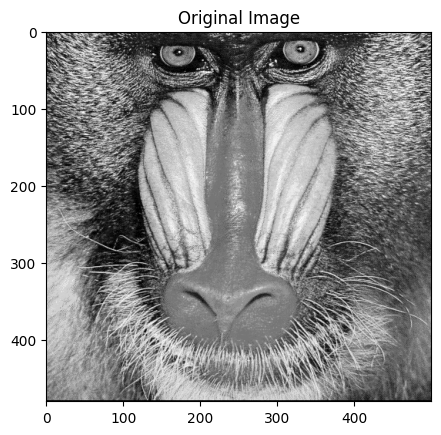

Image compressed and saved as 'svd_compressed_data.pkl'.


In [127]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle

def im2double(im):
    """method to get double precision of a channel"""
    info = np.iinfo(im.dtype)  # Get the data type of the input image
    return im.astype(float) / info.max

def channel_svd(channel):
    """Calculate SVD of the input image channel"""
    u, sigma, vt = np.linalg.svd(channel)
    return u, sigma, vt

def save_svd_compressed_data(u, sigma, vt, term_number, filename="svd_compressed_data.pkl"):
    """Save the compressed data (U, sigma, V) to a file"""
    with open(filename, 'wb') as f:
        pickle.dump(term_number, f)  # Number of terms to use for reconstruction
        pickle.dump(u, f)  # U matrix
        pickle.dump(sigma, f)  # Sigma vector
        pickle.dump(vt, f)  # V matrix

# Load the image
img = cv2.imread('./baboon.pgm')
# Convert the image to double precision (range [0, 1])
imggray = im2double(img)

# Convert to grayscale if the image is colored
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_image = im2double(gray_image)

# Apply SVD to the grayscale image
u, sigma, vt = channel_svd(gray_image)

# Choose the number of components to retain (reduce dimensionality)
term_number = 15  # You can change this value based on the compression level desired

# Save the compressed data (U, sigma, and V matrices)
save_svd_compressed_data(u[:, :term_number], sigma[:term_number], vt[:term_number, :], term_number)

# Display the original and compressed images
plt.imshow(gray_image, cmap='gray')
plt.title("Original Image")
plt.show()

print(f"Image compressed and saved as 'svd_compressed_data.pkl'.")


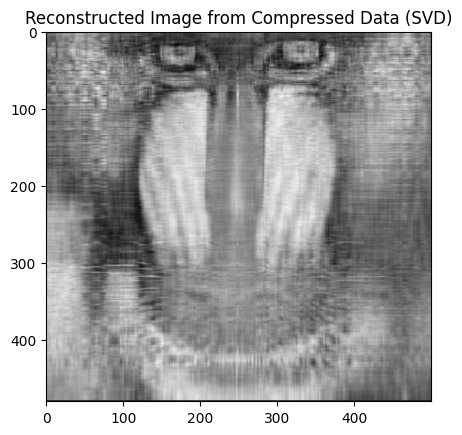

Reconstructed image saved as 'image_after_svd.png'.


In [128]:
def load_svd_compressed_data(filename="svd_compressed_data.pkl"):
    """Load the compressed data (U, sigma, V) from the file"""
    with open(filename, 'rb') as f:
        term_number = pickle.load(f)
        u = pickle.load(f)
        sigma = pickle.load(f)
        vt = pickle.load(f)
    return term_number, u, sigma, vt

def reconstruct_image(u, sigma, vt, term_number):
    """Reconstruct the image from U, sigma, and V matrices"""
    # Reconstruct the image using the first 'term_number' terms
    sigma_matrix = np.diag(sigma)
    reconstructed_img = np.dot(u, np.dot(sigma_matrix, vt))
    return reconstructed_img

# Load the compressed data
term_number, u_loaded, sigma_loaded, vt_loaded = load_svd_compressed_data("svd_compressed_data.pkl")

# Reconstruct the image using the compressed data
reconstructed_img = reconstruct_image(u_loaded, sigma_loaded, vt_loaded, term_number)

# Display the reconstructed image
plt.imshow(reconstructed_img, cmap='gray')
plt.title("Reconstructed Image from Compressed Data (SVD)")
plt.show()

# Save the reconstructed image
cv2.imwrite('image_after_svd.png', np.uint8(reconstructed_img * 255))  # Convert back to original scale

print("Reconstructed image saved as 'image_after_svd.png'.")


In [129]:
import os

def psnr(original_img, reconstructed_img):
    """Calculate the Peak Signal-to-Noise Ratio (PSNR)"""
    mse = np.mean((original_img - reconstructed_img) ** 2)
    max_pixel = 255.0
    return 10 * np.log10((max_pixel ** 2) / mse)

def compression_rate(original_img, compressed_data_filename):
    """Calculate the compression rate"""
    original_size = os.path.getsize('./baboon.pgm')  # Tamanho do arquivo original
    compressed_size = os.path.getsize(compressed_data_filename)  # Tamanho do arquivo comprimido
    return original_size / compressed_size

# Calculate the compression rate and PSNR
rate_svd = compression_rate(gray_image, "svd_compressed_data.pkl")
psnr_svd = psnr(gray_image, reconstructed_img)

print(f"Compression Rate (SVD): {rate_svd:.2f}")
print(f"PSNR (SVD): {psnr_svd:.2f} dB")


Compression Rate (SVD): 2.03
PSNR (SVD): 68.38 dB
